In [3]:
import b3d
import jax.numpy as jnp
import os
from b3d import Mesh, Pose
import jax
import genjax
from genjax import Pytree
import rerun as rr
from b3d.modeling_utils import uniform_discrete, uniform_pose, gaussian_vmf
import matplotlib.pyplot as plt
from functools import partial
import importlib
from ipywidgets import interact
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np

In [4]:
b3d.rr_init("slam")

In [40]:
room_h, room_w = 1.0, 1.0
line_segments = jnp.array(
    [
        [0.0, 0.0, room_w, 0.0, 1.0, 0.0, 0.0],
        [0.0, 0.0, 0, room_h, 0.0, 1.0, 0.0],
        [room_w, 0.0, room_w, room_h, 0.0, 0.0, 1.0],
        [0.0, room_h, room_w, room_h, 1.0, 1.0, 0.0],
    ]
)
line_segments = jnp.concatenate(
    [
        line_segments,
        line_segments
        + jnp.array([room_w + 0.002, 0.0, room_w + 0.002, 0.0, 0.0, 0.0, 0.0]),
        line_segments
        + jnp.array(
            [room_w * 2.0 + 0.003, 0.0, room_w * 2.0 + 0.003, 0.0, 0.0, 0.0, 0.0]
        ),
    ],
    axis=0,
)
world_height = 0.5


def line_segment_to_mesh(line_segment):
    a, b, c, d, r1, g1, b1 = line_segment
    vertices = jnp.array(
        [
            [a, world_height / 2, b],
            [a, -world_height / 2, b],
            [c, -world_height / 2, d],
            [c, world_height / 2, d],
        ]
    )
    faces = jnp.array(
        [
            [0, 1, 3],
            [3, 1, 2],
        ]
    )
    vertex_attributes = jnp.ones((len(vertices), 3)) * jnp.array([r1, g1, b1])
    return Mesh(vertices, faces, vertex_attributes)


world_mesh = Mesh.squeeze_mesh(jax.vmap(line_segment_to_mesh)(line_segments))
world_mesh.rr_visualize("mesh")

In [31]:
renderer = b3d.RendererOriginal()

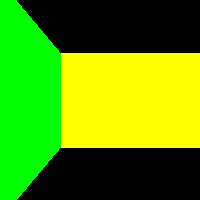

In [43]:
camera_pose = Pose.from_translation(jnp.array([0.21, 0.0, 0.21]))
rgbd = renderer.render_rgbd_from_mesh(world_mesh.transform(camera_pose.inv()))
b3d.viz_rgb(rgbd)

In [9]:
import trimesh

mesh = trimesh.load("identical_rooms_single_mesh.obj")
# mesh = Mesh.from_obj("identical_rooms_single_mesh.obj")
mesh.vertices

TrackedArray([[-1.025,  0.   ,  1.02 ],
              [-1.025,  0.   ,  1.02 ],
              [-1.025,  0.   ,  1.02 ],
              [-1.025,  0.   ,  1.02 ],
              [-1.025,  0.   , -1.   ],
              [-1.025,  0.   , -1.   ],
              [-1.025,  0.   , -1.   ],
              [-1.025, -2.   , -1.   ],
              [-1.025, -2.   , -1.   ],
              [-1.025, -2.   , -1.   ],
              [-1.025, -2.   ,  1.02 ],
              [-1.025, -2.   ,  1.02 ],
              [-1.025, -2.   ,  1.02 ],
              [-1.025, -2.   ,  1.02 ],
              [-3.015, -2.   , -1.   ],
              [-3.015, -2.   , -1.   ],
              [-3.015, -2.   , -1.   ],
              [-3.015,  0.   , -1.   ],
              [-3.015,  0.   , -1.   ],
              [-3.015,  0.   , -1.   ],
              [-3.015, -2.   ,  1.   ],
              [-3.015, -2.   ,  1.   ],
              [-3.015, -2.   ,  1.   ],
              [-3.015,  0.   ,  1.   ],
              [-3.015,  0.   ,  1.   ],


In [4]:
b3d.rr_init("slam")

In [7]:
obj = Mesh.from_obj("identical_rooms_single_mesh.obj")
obj.rr_visualize("mesh")

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'